In [50]:
import pyvisa as visa
import sys
from qcodes_contrib_drivers.drivers.Tektronix.AFG3000_test import AFG3000

from typing import Any, Tuple, Sequence, cast

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from qcodes import VisaInstrument
import qcodes.utils.validators as vals
from qcodes.utils.helpers import create_on_off_val_mapping

import time
import binascii

In [51]:
rm = visa.ResourceManager()

In [52]:
AWG = rm.open_resource('USB0::0xF4EC::0x1101::SDG6XFCC8R0037::INSTR')
AWG.query('*IDN?')

'Siglent Technologies,SDG6022X,SDG6XFCC8R0037,6.01.01.36R8\n'

In [ ]:
# Channel 1 calibration: high set to 444mV, low set to -446mV
# Channel 2 calibration: high set to 500mV, low set to -506mV

In [4]:
# For full output
AWG.write("C1:BSWV HLEV,0.9439,LLEV,-0.9457")
AWG.write("C2:BSWV HLEV,0.9426,LLEV,-0.9447")

34

In [5]:
waveform = []
for i in range(1):
    for i in range(1):
        waveform.append(0)
    for i in range(50):
        waveform.append(1)
    for i in range(0):
        waveform.append(0)
    for i in range(99):
        waveform.append(0)
numpoints = len(waveform)
period = numpoints
freq = (1/numpoints)*1000000000
# freq = (1/20)*1000000000
data = b''
for a in waveform:
    if a==-1:
        data += (-32768).to_bytes(2, 'little', signed=True)
    elif a==0: 
        data += (0).to_bytes(2, 'little', signed=True)
    elif a==1:
        data += (32767).to_bytes(2, 'little', signed=True)
data = data.decode("latin1")
print(data)


  ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ                                                                                                                                                                                                      


In [6]:
min = ((-32768).to_bytes(2, 'little', signed=True)).decode("latin1")

In [53]:
zero = ((0).to_bytes(2, 'little', signed=True)).decode("latin1")

In [40]:
one = ((32767).to_bytes(2, 'little', signed=True)).decode("latin1")

In [49]:
np.linspace(100.5, 0.5, 201)

array([100.5, 100. ,  99.5,  99. ,  98.5,  98. ,  97.5,  97. ,  96.5,
        96. ,  95.5,  95. ,  94.5,  94. ,  93.5,  93. ,  92.5,  92. ,
        91.5,  91. ,  90.5,  90. ,  89.5,  89. ,  88.5,  88. ,  87.5,
        87. ,  86.5,  86. ,  85.5,  85. ,  84.5,  84. ,  83.5,  83. ,
        82.5,  82. ,  81.5,  81. ,  80.5,  80. ,  79.5,  79. ,  78.5,
        78. ,  77.5,  77. ,  76.5,  76. ,  75.5,  75. ,  74.5,  74. ,
        73.5,  73. ,  72.5,  72. ,  71.5,  71. ,  70.5,  70. ,  69.5,
        69. ,  68.5,  68. ,  67.5,  67. ,  66.5,  66. ,  65.5,  65. ,
        64.5,  64. ,  63.5,  63. ,  62.5,  62. ,  61.5,  61. ,  60.5,
        60. ,  59.5,  59. ,  58.5,  58. ,  57.5,  57. ,  56.5,  56. ,
        55.5,  55. ,  54.5,  54. ,  53.5,  53. ,  52.5,  52. ,  51.5,
        51. ,  50.5,  50. ,  49.5,  49. ,  48.5,  48. ,  47.5,  47. ,
        46.5,  46. ,  45.5,  45. ,  44.5,  44. ,  43.5,  43. ,  42.5,
        42. ,  41.5,  41. ,  40.5,  40. ,  39.5,  39. ,  38.5,  38. ,
        37.5,  37. ,

In [56]:
AWG.write("C2:WVDT WVNM,wave1,WAVEDATA,%s" % (zero), encoding='latin1')
AWG.write("C2:ARWV NAME,wave1")

20

In [54]:
AWG.write("C2:WVDT WVNM,wave2,FREQ," + str(freq) + ",WAVEDATA,%s" % (data), encoding='latin1')
AWG.write("C2:ARWV NAME,wave2")

NameError: name 'data' is not defined

In [439]:
# AWG.write("C1:WVDT WVNM,wave1,FREQ," + str(freq) + ",WAVEDATA,%s" % (data), encoding='latin1')
# AWG.write("C1:ARWV NAME,wave1")
AWG.write("C2:WVDT WVNM,wave1,FREQ," + str(freq) + ",WAVEDATA,%s" % (data), encoding='latin1')
AWG.write("C2:ARWV NAME,wave1")

20

In [95]:
def rest(ch1data, ch2data, num_restpoints):
    for i in range(num_restpoints):
        ch1data.append(0)
        ch2data.append(0)

def pix(ch1data, ch2data, pitime):
    for i in range(pitime):
        ch1data.append(1)
        ch2data.append(0)

def piy(ch1data, ch2data, pi2time):
    for i in range(pi2time):
        ch1data.append(0)
        ch2data.append(1)

def min_pix(ch1data, ch2data, pitime):
    for i in range(pitime):
        ch1data.append(-1)
        ch2data.append(0)

def min_piy(ch1data, ch2data, pi2time):
    for i in range(pi2time):
        ch1data.append(0)
        ch2data.append(-1)

def pi_2x(ch1data, ch2data, pi2time):
    for i in range(pi2time):
        ch1data.append(1)
        ch2data.append(0)

def pi_2y(ch1data, ch2data, pi2time):
    for i in range(pi2time):
        ch1data.append(0)
        ch2data.append(1)

def min_pi_2x(ch1data, ch2data, pi2time):
    for i in range(pi2time):
        ch1data.append(-1)
        ch2data.append(0)

def min_pi_2y(ch1data, ch2data, pi2time):
    for i in range(pi2time):
        ch1data.append(0)
        ch2data.append(-1)

def convert(data):
    bindata = b''

    for a in data:
        if a==-1:
            bindata += (-32768).to_bytes(2, 'little', signed=True)
        elif a==0: 
            bindata += (0).to_bytes(2, 'little', signed=True)
        elif a==1:
            bindata += (32767).to_bytes(2, 'little', signed=True)

    bindata = bindata.decode("latin1")
    return(bindata)


In [105]:
def pix(pitime):
    ch1data = []
    ch2data = []
    
    ch1data.append(0)
    ch2data.append(0)
    for i in range(pitime):
        ch1data.append(1)
        ch2data.append(0)
    ch1data.append(0)
    ch2data.append(0)
    
    ch1bin = convert(ch1data)
    ch2bin = convert(ch2data)
    return(ch1bin, ch2bin)

In [106]:
pitime = 50
pixch1 = pix(pitime)[0]
pixch2 = pix(pitime)[1]
print(len(pixch1))


104


In [89]:
def convert(ch1data, ch2data):
    ch1bin = b''
    ch2bin = b''

    for a in ch1data:
        if a==-1:
            ch1bin += (-32768).to_bytes(2, 'little', signed=True)
        elif a==0: 
            ch1bin += (0).to_bytes(2, 'little', signed=True)
        elif a==1:
            ch1bin += (32767).to_bytes(2, 'little', signed=True)
    for a in ch2data:
        if a==-1:
            ch2bin += (-32768).to_bytes(2, 'little', signed=True)
        elif a==0: 
            ch2bin += (0).to_bytes(2, 'little', signed=True)
        elif a==1:
            ch2bin += (32767).to_bytes(2, 'little', signed=True)

    ch1bin = ch1bin.decode("latin1")
    ch2bin = ch2bin.decode("latin1")
    return(ch1bin, ch2bin)

# XY8 seq

In [17]:
pitime = 100
pi_2time = 50
tau = 200000
numxy8 = 10
buffer = 10
psperiod = 2*buffer + 2*pi_2time + numxy8*tau*8 + numxy8*pitime*8

ch1data = []
ch2data = []

rest(ch1data, ch2data, buffer)
pi_2y(ch1data, ch2data, pi_2time)
rest(ch1data, ch2data, int(tau/2))

for i in range(numxy8):
    pix(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    piy(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    pix(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    piy(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    piy(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    pix(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    piy(ch1data, ch2data, pitime)
    rest(ch1data, ch2data, tau)
    pix(ch1data, ch2data, pitime)
    if i<(numxy8-1):
        rest(ch1data, ch2data, tau)

rest(ch1data, ch2data, int(tau/2))
pi_2y(ch1data, ch2data, pi_2time)
rest(ch1data, ch2data, buffer)
freq = (1/psperiod)*1000000000
print(psperiod)


16008120


In [18]:
ch1bindata = b''
ch2bindata = b''

for a in ch1data:
    if a==-1:
        ch1bindata += (-32768).to_bytes(2, 'little', signed=True)
    elif a==0: 
        ch1bindata += (0).to_bytes(2, 'little', signed=True)
    elif a==1:
        ch1bindata += (32767).to_bytes(2, 'little', signed=True)
for a in ch2data:
    if a==-1:
        ch2bindata += (-32768).to_bytes(2, 'little', signed=True)
    elif a==0: 
        ch2bindata += (0).to_bytes(2, 'little', signed=True)
    elif a==1:
        ch2bindata += (32767).to_bytes(2, 'little', signed=True)

ch1bindata = ch1bindata.decode("latin1")
ch2bindata = ch2bindata.decode("latin1")

KeyboardInterrupt: 

In [111]:
zero = []
for i in range(50):
    zero.append(0)

one = []
for i in range(50):
    one.append(1)

wait = []
for i in range(1000000):
    wait.append(0)

zero_bin = b''
one_bin  = b''
wait_bin  = b''

for a in zero:
    if a==-1:
        zero_bin += (-32768).to_bytes(2, 'little', signed=True)
    elif a==0: 
        zero_bin += (0).to_bytes(2, 'little', signed=True)
    elif a==1:
        zero_bin += (32767).to_bytes(2, 'little', signed=True)
for a in one:
    if a==-1:
        one_bin += (-32768).to_bytes(2, 'little', signed=True)
    elif a==0: 
        one_bin += (0).to_bytes(2, 'little', signed=True)
    elif a==1:
        one_bin += (32767).to_bytes(2, 'little', signed=True)
for a in wait:
    if a==-1:
        wait_bin += (-32768).to_bytes(2, 'little', signed=True)
    elif a==0: 
        wait_bin += (0).to_bytes(2, 'little', signed=True)
    elif a==1:
        wait_bin += (32767).to_bytes(2, 'little', signed=True)
        


KeyboardInterrupt: 

In [ ]:


zero_bin = zero_bin.decode("latin1")
one_bin = one_bin.decode("latin1")
wait_bin = wait_bin.decode("latin1")

In [71]:
print(len(wait_bin))

200000


In [109]:
seq = zero_bin

for i in range(50):
    for i in range(10):
        seq += one_bin
        seq += zero_bin
    for i in range(10):
        seq += wait_bin

psperiod = len(seq)
print(psperiod)
freq = (1/psperiod)*1000000000

10100100


In [107]:
AWG.write("C1:WVDT WVNM,wave1,FREQ," + str(freq) + ",WAVEDATA,%s" % (pixch1), encoding='latin1')
AWG.write("C1:ARWV NAME,wave1")
AWG.write("C2:WVDT WVNM,wave2,FREQ," + str(freq) + ",WAVEDATA,%s" % (pixch2), encoding='latin1')
AWG.write("C2:ARWV NAME,wave2")

20

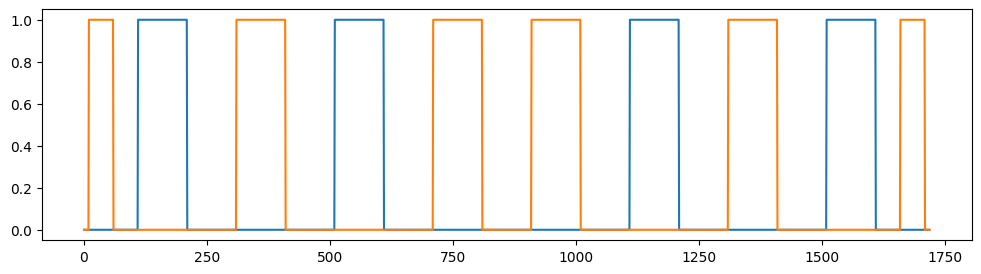

In [468]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(ch1data)
ax.plot(ch2data)

In [1]:
from qcodes_contrib_drivers.drivers.Siglent.SDG6022X import SDG6022X

In [2]:
AWG = SDG6022X()

In [6]:
AWG.send_Rabi_seq(pulse_width=100, buffer = 1)

In [3]:
AWG.turn_off()

## CHeck with numpy

In [17]:
# Create arrays of zeros, ones, and waits using NumPy
zero = np.zeros(1, dtype=np.int16) 
one = np.ones(1, dtype=np.int16) * 32767
wait = np.ones(100, dtype=np.int16)

# Convert arrays to bytes
zero_bin = zero.tobytes()
one_bin = one.tobytes()
wait_bin = wait.tobytes()

# Optionally, if you want to convert -1, 0, and 1 values to the corresponding bytes
# # You can use a mapping dictionary for the conversion
# value_to_bytes = {-1: (-32768).to_bytes(2, 'little', signed=True),
#                   0: (0).to_bytes(2, 'little', signed=True),
#                   1: (32767).to_bytes(2, 'little', signed=True)}

# # # # Convert arrays to bytes using the mapping dictionary
# zero_bin = b''.join(value_to_bytes[value] for value in zero)
# one_bin = b''.join(value_to_bytes[value] for value in one)
# wait_bin = b''.join(value_to_bytes[value] for value in wait)
print(one_bin)

b'\xff\x7f'


In [18]:
zero_bin = zero_bin.decode("latin1")
one_bin = one_bin.decode("latin1")
wait_bin = wait_bin.decode("latin1")
print(one_bin)

ÿ


In [21]:
zero = np.zeros(1, dtype=np.int16) 
one = np.ones(1, dtype=np.int16) * 32767
minone = np.ones(1, dtype=np.int16) * -32768
zero_bin = zero.tobytes()
one_bin = one.tobytes()
minone_bin = minone.tobytes()
zero_bin = zero_bin.decode("latin1")
one_bin = one_bin.decode("latin1")
minone_bin = minone_bin.decode("latin1")
freq = 1000000
print(one_bin)

ÿ


In [36]:
AWG.write("C2:WVDT WVNM,wave1,FREQ," + str(freq) + ",WAVEDATA,%s" % (minone_bin), encoding='latin1')
AWG.write("C2:ARWV NAME,wave1")

20

In [19]:
seq = ''

for i in range(2):
    for i in range(5):
        seq += one_bin
        seq += zero_bin
    for i in range(1):
        seq += wait_bin

psperiod = len(seq)
print(psperiod)
freq = (1/psperiod)*1000000000

440


In [20]:
AWG.write("C1:WVDT WVNM,wave1,FREQ," + str(freq) + ",WAVEDATA,%s" % (seq), encoding='latin1')
AWG.write("C1:ARWV NAME,wave1")
# AWG.write("C2:WVDT WVNM,wave2,FREQ," + str(freq) + ",WAVEDATA,%s" % (pixch2), encoding='latin1')
# AWG.write("C2:ARWV NAME,wave2")

20

In [169]:
ch1data = []
ch2data = []
num_restpoints = 10

In [217]:
def rest(ch1data, ch2data, num_restpoints):
    ch1data = np.concatenate((ch1data, np.zeros(num_restpoints, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, np.zeros(num_restpoints, dtype=np.int16)))
    return(ch1data, ch2data)

def pix(ch1data, ch2data, pitime):
    ch1data = np.concatenate((ch1data, 32767*np.ones(pitime, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, np.zeros(pitime, dtype=np.int16)))
    return(ch1data, ch2data)

def piy(ch1data, ch2data, pitime):
    ch1data = np.concatenate((ch1data, np.zeros(pitime, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, 32767*np.ones(pitime, dtype=np.int16)))
    return(ch1data, ch2data)

def min_pix(ch1data, ch2data, pitime):
    ch1data = np.concatenate((ch1data, -32768*np.ones(pitime, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, np.zeros(pitime, dtype=np.int16)))
    return(ch1data, ch2data)

def min_piy(ch1data, ch2data, pitime):
    ch1data = np.concatenate((ch1data, np.zeros(pitime, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, -32768*np.ones(pitime, dtype=np.int16)))
    return(ch1data, ch2data)

def pi_2x(ch1data, ch2data, pi2time):
    ch1data = np.concatenate((ch1data, 32767*np.ones(pi2time, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, np.zeros(pi2time, dtype=np.int16)))
    return(ch1data, ch2data)

def pi_2y(ch1data, ch2data, pi2time):
    ch1data = np.concatenate((ch1data, np.zeros(pi2time, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, 32767*np.ones(pi2time, dtype=np.int16)))
    return(ch1data, ch2data)

def min_pi_2x(ch1data, ch2data, pi2time):
    ch1data = np.concatenate((ch1data, -32768*np.ones(pi2time, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, np.zeros(pi2time, dtype=np.int16)))
    return(ch1data, ch2data)

def min_pi_2y(ch1data, ch2data, pi2time):
    ch1data = np.concatenate((ch1data, np.zeros(pi2time, dtype=np.int16)))
    ch2data = np.concatenate((ch2data, -32768*np.ones(pi2time, dtype=np.int16)))
    return(ch1data, ch2data)

def convert(ch1data, ch2data):
    ch1bin = ch1data.tobytes()
    ch2bin = ch2data.tobytes()
    ch1bin = ch1bin.decode("latin1")
    ch2bin = ch2bin.decode("latin1")
    return(ch1bin, ch2bin)

In [221]:
ch1data = []
ch2data = []

# ch1data = np.concatenate((ch1data, 32767*np.ones(pitime, dtype=np.int16)))
# ch2data = np.concatenate((ch2data, np.zeros(pitime, dtype=np.int16)))

ch1data, ch2data = rest(ch1data, ch2data, buffer)
ch1data, ch2data = pix(ch1data, ch2data, pitime)
ch1data, ch2data = rest(ch1data, ch2data, buffer)
ch1data = ch1data/32767 + 3
print(ch1data)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [ ]:
phi = np.linspace(0, np.pi, 100)

Q_vals = []
I_vals = []
check_vals = []

for i in range(np.size(phi)):
    Q = 32767*np.sin(phi[i])
    I = 32767*np.cos(phi[i])
    check = ((round(Q)/32767)**2+(round(I)/32767)**2)**0.5

    Q_vals.append(round(Q))
    I_vals.append(round(I))
    check_vals.append(check)
    

plt.plot(phi, check_vals)
plt.plot(phi, Q_vals)
plt.plot(phi, I_vals)


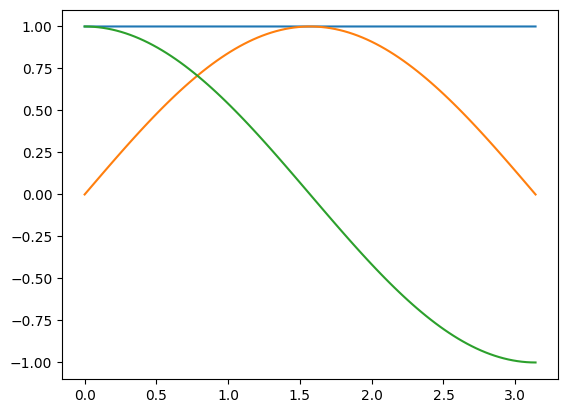

In [89]:
phi = np.linspace(0, np.pi, 100)

Q_vals = []
I_vals = []
check_vals = []

for i in range(np.size(phi)):
    Q = 32767*np.sin(phi[i])
    I = 32767*np.cos(phi[i])
    check = ((round(Q)/32767)**2+(round(I)/32767)**2)**0.5

    Q_vals.append(round(Q)/32767)
    I_vals.append(round(I)/32767)
    check_vals.append(check)
    

plt.plot(phi, check_vals)
plt.plot(phi, Q_vals)
plt.plot(phi, I_vals)


In [72]:
print(check_vals)

[1.0, 1.0000049404899325, 0.999989243906914, 1.0000139463781939, 0.9999874966188004, 1.000001445965505, 0.9999947637711881, 0.9999979663309672, 1.0000110535498736, 1.0000035187452605, 1.000005873261379, 0.9999876167682408, 1.0000097528920437, 1.00001128452939, 0.9999922229515965, 1.0000135500816987, 1.0000142923807633, 0.9999944638653994, 1.0000150193117474, 1.0000150141892374, 0.9999944652624762, 1.000012280627944, 1.000011482445264, 0.9999901720360589, 1.000009233652946, 1.0000054001233003, 1.0000138080702692, 1.0000017477319556, 0.9999969599729501, 1.0000047164942634, 0.999992046453808, 0.9999863798802885, 0.9999935622847226, 1.0000075571840636, 1.0000042470811394, 1.0000075781399418, 0.9999938361119974, 0.9999865656929964, 0.9999891195664162, 1.0000052310788339, 0.9999972505641705, 0.9999991175176096, 1.000010831883997, 1.0000021533469021, 1.0000033473720353, 0.9999885048491213, 1.0000051528433687, 1.0000057913004679, 0.9999861577432464, 1.0000066095122158, 1.0000068181398054, 0.99

In [81]:
print(Q_vals)

[0, 103, 206, 309, 412, 515, 618, 721, 824, 927, 1030, 1133, 1236, 1339, 1442, 1545, 1648, 1751, 1854, 1957, 2060, 2162, 2265, 2368, 2471, 2573, 2676, 2779, 2881, 2984, 3087, 3189, 3292, 3394, 3497, 3599, 3702, 3804, 3906, 4009, 4111, 4213, 4315, 4417, 4519, 4622, 4723, 4825, 4927, 5029, 5131, 5233, 5334, 5436, 5538, 5639, 5741, 5842, 5943, 6045, 6146, 6247, 6348, 6449, 6550, 6651, 6752, 6853, 6954, 7054, 7155, 7255, 7356, 7456, 7557, 7657, 7757, 7857, 7957, 8057, 8157, 8257, 8356, 8456, 8555, 8655, 8754, 8853, 8953, 9052, 9151, 9250, 9348, 9447, 9546, 9644, 9743, 9841, 9939, 10037, 10135, 10233, 10331, 10429, 10527, 10624, 10721, 10819, 10916, 11013, 11110, 11207, 11304, 11400, 11497, 11593, 11690, 11786, 11882, 11978, 12074, 12170, 12265, 12361, 12456, 12551, 12646, 12741, 12836, 12931, 13026, 13120, 13214, 13309, 13403, 13497, 13591, 13684, 13778, 13871, 13965, 14058, 14151, 14244, 14336, 14429, 14521, 14614, 14706, 14798, 14890, 14981, 15073, 15164, 15256, 15347, 15438, 15529, 1561

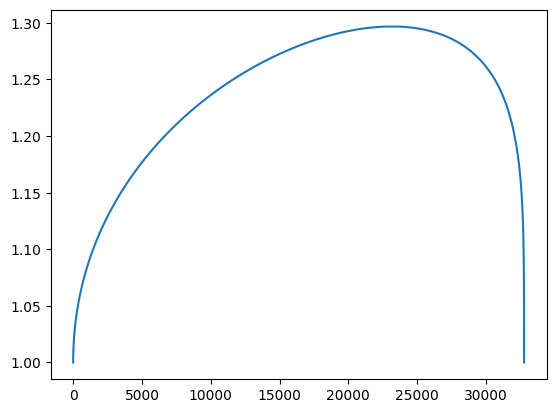

In [64]:
plt.plot(possible_vals, check_vals)